# Inference: Log priors

This example notebook illustrates some of the functionality that is available for `LogPrior` objects that are currently available within PINTS.

In [1]:
from __future__ import print_function
import os
os.chdir('..')
import pints
import numpy as np
import matplotlib.pyplot as plt

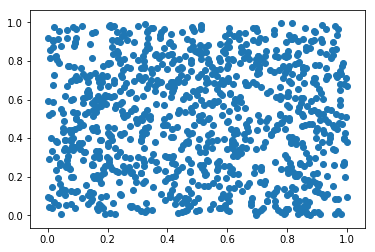

In [7]:
n = 1000
samples = log_prior.sample(n)
u = []
for i in range(n):
    u.append(log_prior.cdf(samples[i]))
u = np.vstack(u)
plt.scatter(u[:, 1], u[:, 2])
plt.show()

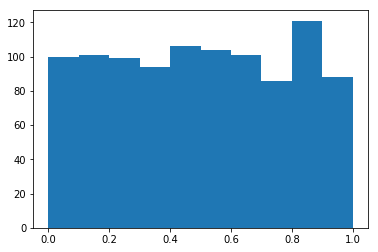

In [8]:
plt.hist(u[:, 1])
plt.show()

4.29397007204
2.98956518578
7.08798014314
3.99951045955
4.00537868363
2.98956518578
7.02805417326
3.99951045955
4.18444924398
2.98956518578
7.02982575275
3.99951045955
4.66453442889
2.98956518578
7.15497502175
3.99951045955
3.91131336351
2.98956518578
6.98843914978
3.99951045955
4.1270199494
2.98956518578
7.02659899572
3.99951045955
4.16280413899
2.98956518578
6.97493515441
3.99951045955
4.14272480381
2.98956518578
6.98905340773
3.99951045955
4.04873370402
2.98956518578
7.04406908157
3.99951045955
4.12140371177
2.98956518578
7.0119302379
3.99951045955
4.33092556863
2.98956518578
7.10520869049
3.99951045955
4.07157478777
2.98956518578
6.95109267067
3.99951045955
4.03390620482
2.98956518578
7.07150697743
3.99951045955
4.08857572587
2.98956518578
6.99383333484
3.99951045955
4.58085264153
2.98956518578
7.03600295759
3.99951045955
3.75544933432
2.98956518578
7.02332937093
3.99951045955
3.72567496644
2.98956518578
7.0279972222
3.99951045955
4.17997049971
2.98956518578
6.9895946762
3.99951045

6.94390919172
3.99951045955
4.50210263731
2.98956518578
7.18599321186
3.99951045955
3.73153613979
2.98956518578
6.99629088904
3.99951045955
4.03244502653
2.98956518578
7.05564883859
3.99951045955
3.75912534482
2.98956518578
6.94161320349
3.99951045955
3.7689257128
2.98956518578
6.92495779067
3.99951045955
4.06274941292
2.98956518578
6.99239979428
3.99951045955
3.84603111057
2.98956518578
6.90530849251
3.99951045955
3.76960746734
2.98956518578
6.98406999036
3.99951045955
4.4954442323
2.98956518578
7.07223464828
3.99951045955
3.79830130398
2.98956518578
6.98117079228
3.99951045955
4.13169925696
2.98956518578
7.05531873595
3.99951045955
4.14334157393
2.98956518578
7.0600308383
3.99951045955
3.93626481843
2.98956518578
6.98616307892
3.99951045955
3.97172929075
2.98956518578
6.99107570263
3.99951045955
4.48025139972
2.98956518578
7.13742911886
3.99951045955
4.18670073922
2.98956518578
7.00513542246
3.99951045955
3.82350080157
2.98956518578
6.94889166463
3.99951045955
4.38043812176
2.9895651

2.98956518578
7.07810574749
3.99951045955
3.81485513486
2.98956518578
7.02205361339
3.99951045955
4.17672257289
2.98956518578
7.03453408597
3.99951045955
3.8490277576
2.98956518578
6.99566493306
3.99951045955
3.79780509978
2.98956518578
6.97012246853
3.99951045955
4.00880770072
2.98956518578
7.04363860152
3.99951045955
4.37009747796
2.98956518578
7.09616273529
3.99951045955
3.58995939672
2.98956518578
6.94577037391
3.99951045955
3.72533506261
2.98956518578
6.92561034448
3.99951045955
4.01412984301
2.98956518578
7.0000553001
3.99951045955
3.71131936874
2.98956518578
6.99561590103
3.99951045955
3.90282676308
2.98956518578
7.00679856595
3.99951045955
3.60200322765
2.98956518578
6.91210605355
3.99951045955
3.57762744243
2.98956518578
6.92196745356
3.99951045955
4.06712565769
2.98956518578
7.0162782969
3.99951045955
4.04512977601
2.98956518578
7.02767737504
3.99951045955
3.90174143732
2.98956518578
6.95795176097
3.99951045955
4.47347282901
2.98956518578
7.10087484739
3.99951045955
3.9871840

4.22794594307
2.98956518578
7.09878744687
3.99951045955
3.93570524994
2.98956518578
6.99237672079
3.99951045955
3.96939227541
2.98956518578
7.0441020278
3.99951045955
3.68594892491
2.98956518578
6.9340417653
3.99951045955
3.70330459927
2.98956518578
7.0350734712
3.99951045955
4.0918747132
2.98956518578
7.05297777444
3.99951045955
3.64256044517
2.98956518578
6.93873757299
3.99951045955
3.89441200143
2.98956518578
6.91695552416
3.99951045955
3.73660761119
2.98956518578
6.94647958291
3.99951045955
3.62522974851
2.98956518578
6.97908579634
3.99951045955
4.39954365377
2.98956518578
7.10242880366
3.99951045955
4.32384408764
2.98956518578
7.1198096901
3.99951045955
3.89554492066
2.98956518578
6.98746394062
3.99951045955
4.10099232429
2.98956518578
6.99142624427
3.99951045955
4.13759359971
2.98956518578
7.02232572072
3.99951045955
3.73244731961
2.98956518578
6.99700002378
3.99951045955
4.32574843702
2.98956518578
7.00167740664
3.99951045955
3.64646596166
2.98956518578
6.92676104162
3.999510459

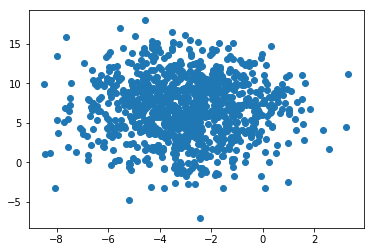

In [9]:
n = 1000
theta = []
for i in range(n):
    theta.append(log_prior.icdf(u[i]))
theta = np.vstack(theta)
plt.scatter(theta[:, 0], theta[:, 2])
plt.show()

The uniform prior, $U\sim(a, b)$, here with $a=-10$ and $b=15$. When this function is called, its log density is returned.

In [10]:
uniform_log_prior = pints.UniformLogPrior(-10, 15)

print('U(0|a=-10, b=15) = ' + str(uniform_log_prior([0])))

U(0|a=-10, b=15) = -3.21887582487


To plot the density, we take the exponential of its log density.

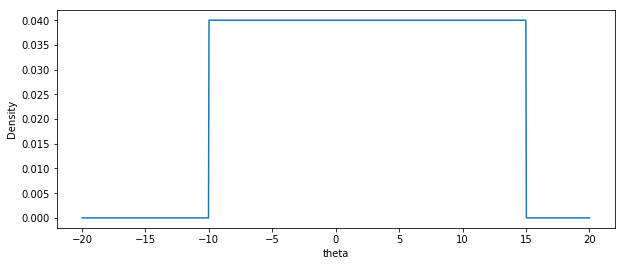

In [11]:
values = np.linspace(-20, 20, 1000)
log_prob = [uniform_log_prior([x]) for x in values]
prob = np.exp(log_prob)

plt.figure(figsize=(10,4))
plt.xlabel('theta')
plt.ylabel('Density')
plt.plot(values, prob)
plt.show()

To specify a multidimensional uniform prior, use the same function. Here we specify, $\theta_1\sim U(2, 4)$ and $\theta_2\sim U(-7,-5)$.

In [12]:
uniform_log_prior = pints.UniformLogPrior([2, -7], [4, -5])

Plot $p(\theta_2|\theta_1 = 3)$.

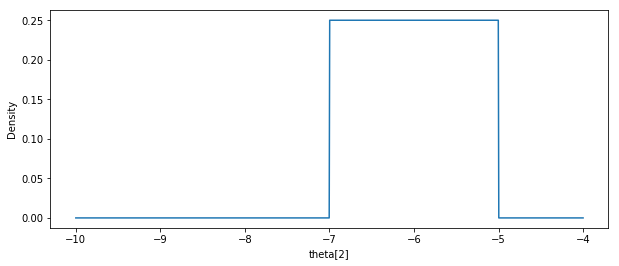

In [13]:
values = np.linspace(-10, -4, 1000)
log_prob = [uniform_log_prior([3, x]) for x in values]
prob = np.exp(log_prob)

plt.figure(figsize=(10,4))
plt.xlabel('theta[2]')
plt.ylabel('Density')
plt.plot(values, prob)
plt.show()

If you have a prior constrained to lie $\in[0,1]$, you can use a beta prior.

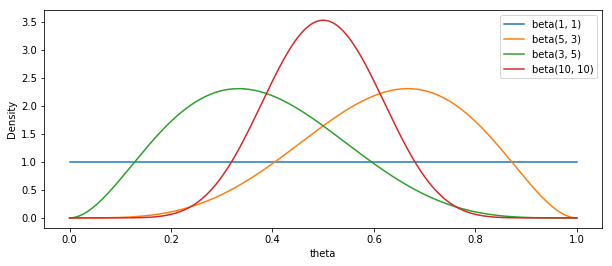

In [14]:
beta_log_prior1 = pints.BetaLogPrior(1, 1)
beta_log_prior2 = pints.BetaLogPrior(5, 3)
beta_log_prior3 = pints.BetaLogPrior(3, 5)
beta_log_prior4 = pints.BetaLogPrior(10, 10)

values = np.linspace(0, 1, 1000)
prob1 = np.exp([beta_log_prior1([x]) for x in values])
prob2 = np.exp([beta_log_prior2([x]) for x in values])
prob3 = np.exp([beta_log_prior3([x]) for x in values])
prob4 = np.exp([beta_log_prior4([x]) for x in values])

plt.figure(figsize=(10,4))
plt.xlabel('theta')
plt.ylabel('Density')
plt.plot(values, prob1)
plt.plot(values, prob2)
plt.plot(values, prob3)
plt.plot(values, prob4)
plt.legend(['beta(1, 1)', 'beta(5, 3)', 'beta(3, 5)', 'beta(10, 10)'])
plt.show()

Specifying a value outside the support of the distribution returns $-\infty$ for the log density.

In [15]:
print('beta(-0.5|a=1, b=1) = ' + str(beta_log_prior1([-0.5])))

beta(-0.5|a=1, b=1) = -inf


Each prior has a `mean` function that allows you to quickly check what parameterisation is being used.

In [16]:
print('mean = ' + str(beta_log_prior3.mean()))

mean = 0.375


Each prior also has a `sample` function which allows generation of independent samples from each distribution. Using this we can sample from a Student-t density, with input dimensions `(location, degrees of freedom, scale)`.

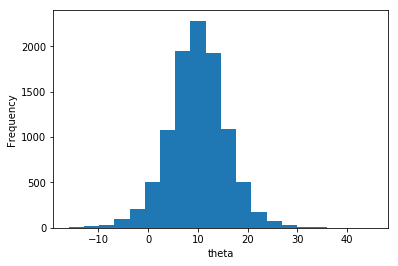

In [17]:
n = 10000
student_t_log_prior = pints.StudentTLogPrior(10, 8, 5)
samples = student_t_log_prior.sample(n)

plt.hist(samples, 20)
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.show()

For models with multiple parameters, we can specify different distributions for each dimension using `ComposedLogPrior`.

In [18]:
log_prior1 = pints.GaussianLogPrior(6, 3)
log_prior2 = pints.InverseGammaLogPrior(5, 5)
log_prior3 = pints.LogNormalLogPrior(-1, 1)
composed_log_prior = pints.ComposedLogPrior(log_prior1, log_prior2, log_prior3)

# calling
composed_log_prior([-3, 1, 6])

-13.25607355949521

Functions like `sample` and `mean` also work for `ComposedLogPrior` objects.

mean = [6.0, 1.25, 0.60653065971263342]


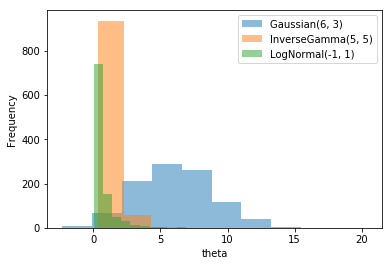

In [19]:
print('mean = ' + str(composed_log_prior.mean()))

n = 10
samples = composed_log_prior.sample(1000)
plt.hist(samples[:, 0], alpha=0.5)
plt.hist(samples[:, 1], alpha=0.5)
plt.hist(samples[:, 2], alpha=0.5)
plt.legend(['Gaussian(6, 3)', 'InverseGamma(5, 5)', 'LogNormal(-1, 1)'])
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.show()

We also have multivariate priors in PINTS. For example, the multivariate Gaussian.

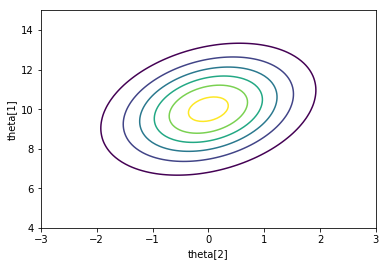

In [20]:
two_d_gaussian_log_prior = pints.MultivariateGaussianLogPrior([0, 10], [[1, 0.5], [0.5, 3]])

# Contour plot of pdf
x = np.linspace(-3, 3, 100)
y = np.linspace(4, 15, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp([[two_d_gaussian_log_prior([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('theta[2]')
plt.ylabel('theta[1]')
plt.show()